# 영화 리뷰 감성분류 경진대회 EDA

안녕하세요! 영화 리뷰 감성분류 경진대회로 돌아온 데이콘 Basic 입니다!

이번 대회는 주어진 긍정 및 부정 리뷰 데이터를 통해 test 데이터의 긍/부정 라벨을 분류하는 대회입니다.

target은 label 컬럼이며 0(부정), 1(긍정) 값으로 이루어져 있습니다.

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지

데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

### 패키지 설치

EDA를 시작하기에 앞서 필요한 패키지들을 설치합니다.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install konlpy
# !pip install collections
# !pip install wordcloud
# !pip install sys

### 데이터 불러오기

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('dataset/train.csv')

data # 데이터를 확인합니다.

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


데이터를 살펴보니 한글로 된 문자열이 주를 이루며, 각 리뷰는 긍정 리뷰는 1, 부정 리뷰는 0으로 라벨링 되어 있습니다.

### 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


결측치가 없는 깔끔한 데이터셋이네요!

결측치 처리는 넘어가도록 하겠습니다.

### 기초 통계 분석

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


info() 함수를 이용해 간단하게 데이터셋을 살펴보았습니다.

보아하니 크게 중요하지 않은 id 컬럼을 제외하면 object형 'document'와, int형 'label' 총 두 개의 컬럼으로 이루어져 있습니다.

리뷰 내용에 해당하는 'document' 변수를 집중적으로 잘펴보아야 할 것 같습니다!

### 긍정/부정 리뷰 비율 확인

긍정 및 부정 리뷰 각각의 개수를 확인해보겠습니다.

In [5]:
val_count = data['label'].value_counts() # 유니크값의 개수를 확인합니다.
print('라벨 0인 리뷰 개수:', val_count[0])
print('라벨 1인 리뷰 개수:', val_count[1])

라벨 0인 리뷰 개수: 2564
라벨 1인 리뷰 개수: 2436


### 데이터 시각화

그래프 시각화에 필요한 패키지를 불러옵니다.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

plot 함수를 이용해 라벨 개수를 그래프로 그려 시각적으로 비교해보았습니다.

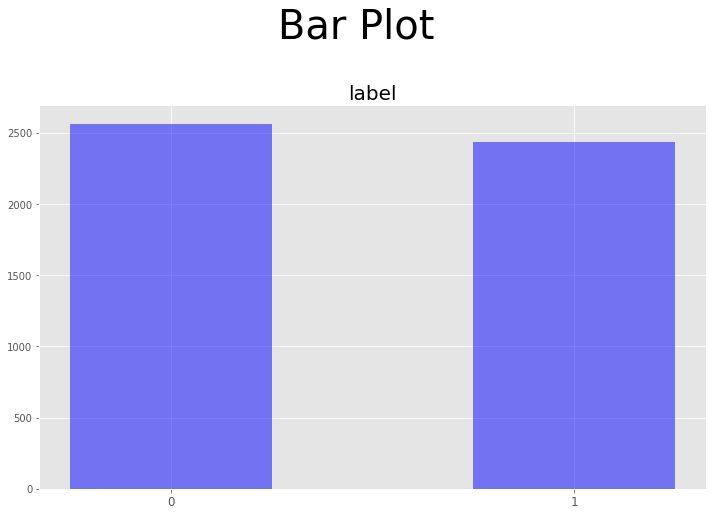

In [7]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = data['label']

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)

plt.title('label', fontsize=20)
temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

두 라벨의 분포가 비슷한 것을 확인했습니다!

### 리뷰 길이 확인

In [8]:
str_len_mean = np.mean(data['document'].str.len())
print('리뷰의 평균 길이 :',str_len_mean)

리뷰의 평균 길이 : 27.1352


리뷰 문자열의 평균 길이는 약 27입니다.

이번에는 리뷰들의 문자열 길이를 히스토그램으로 나타내보겠습니다.

### 전체리뷰 / 긍정리뷰 / 부정리뷰 비교

In [9]:
# 데이터 필터링을 위한 마스크 설정
mask_pos = (data.label == 1)
mask_neg = (data.label == 0)

# 전체 / 긍정 / 부정 리뷰 집합을 설정합니다.
df_train = data.document.copy() # 전체 train 데이터
df_pos = data.loc[mask_pos,:].document # 긍정 리뷰에만 해당하는 train 데이터
df_neg = data.loc[mask_neg,:].document # 부정 리뷰에만 해당하는 train 데이터

# 세 집합을 리스트로 묶어줍니다.
compare = [df_train, df_pos, df_neg]

긍정 / 부정 데이터셋이 잘 분리되었는지 확인합니다.

In [10]:
df_pos.head()

1            히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...
2    괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~
5       내인생에 있어 손까락에 꼽히는 영화 원작을 능가한 리메이크작
7          마음이 성숙하고 보면 다르게 보이는 영화.. 걸작이다.
8                   가슴 찡했던, 오래 기억에남을 영화!!
Name: document, dtype: object

In [11]:
df_neg.head()

0                  영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐
3                아무래도 20년도지난작품이라 지금보기는너무유치하다
4    지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.
6                성룡영화중 최악 .. 차라리 러시아워가 훨씬 나음
9                   결말 기분나쁘다 공포매니아에게 이따위 결말을
Name: document, dtype: object

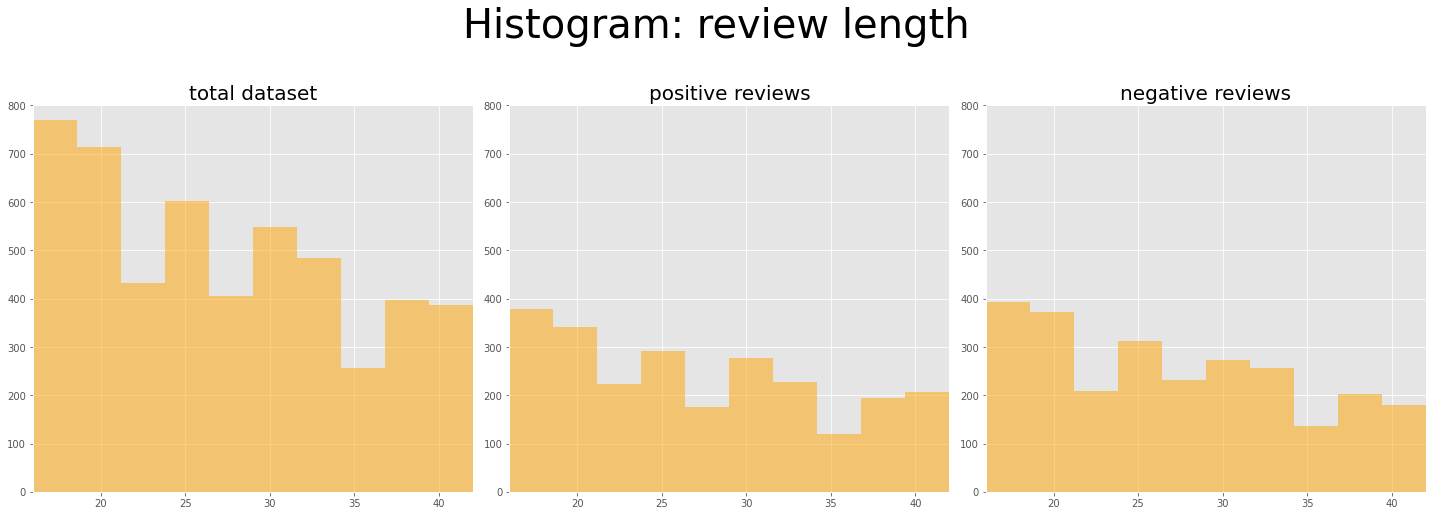

In [12]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,7.5))
plt.suptitle("Histogram: review length", fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews']

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]    
    plt.subplot(1,3,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([16, 42, 0, 800])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

문자열 길이는 15~45 사이에 분포하며 대체적으로 길이가 짧아질수록 빈도수가 더 높은 것을 확인할 수 있습니다.

또한 긍정/부정 데이터에 상관 없이 리뷰의 길이는 비슷한 분포를 보이는군요

이번에는 띄어쓰기를 기준으로 각 리뷰 당 포함하는 어절(word) 수를 살펴보겠습니다.

다음 예시와 같이 split() 함수를 사용해 공백을 기준으로 하여 어절 단위로 문자열을 분리하는 방법을 사용하겠습니다.

In [13]:
word_split = data['document'].str.split() # 공백을 기준으로 문자열을 분리해줍니다.
word_split[:5]

0                     [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                 [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2       [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                      [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4    [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
Name: document, dtype: object

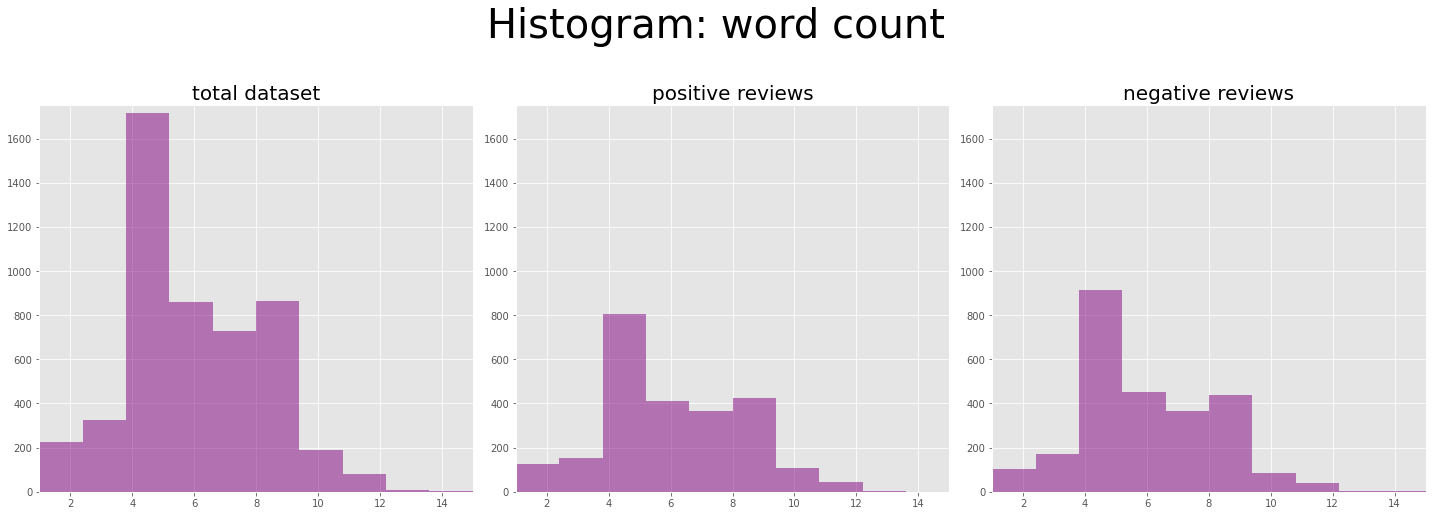

In [14]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,7.5))
plt.suptitle("Histogram: word count", fontsize=40)
name = ['total dataset', 'positive reviews', 'negative reviews']

for i in range(len(compare)):
    document = compare[i]
    split = document.str.split()
    split_len = [len(x) for x in split] 
    plt.subplot(1,3,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([1, 15, 0, 1750])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(split_len, alpha=0.5, color='purple')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

4~6개의 어절로 이루어진 리뷰가 가장 많은 것을 확인했습니다.

분포는 마찬가지로 세 데이터셋이 거의 동일하군요.

# Word Cloud

### 워드 클라우드(word cloud)란?

태그 클라우드와 동의어인 워드 클라우드는 문서의 키워드 등을 직관적으로 파악할 수 있도록 하는 시각화 기법입니다. 

예를 들어, 문서에 자주 언급된 단어일수록 크게 시각화하여 문서에서 등장하는 주요 단어들을 한눈에 파악할 수 있습니다. 

이 기법은 문서 빅데이터 분석에서 자주 사용되곤 합니다.

### 기본 함수 정의

워드 클라우드를 생성하기 위한 패키지를 불러오고 기본 함수들을 정의합니다.

In [15]:
def df2str(df):
    #전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

def get_noun(text):
    # okt tagger를 이용해 명사 추출
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)

    return noun_list

def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'a고딕13.ttf',    # 한글폰트 경로 설정
        background_color='white',                             # 배경 색깔 정하기
        colormap = 'Dark2',                                # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

### 전체 train 데이터 워드 클라우드 생성

In [16]:
document = df2str(df_train)
noun_list = get_noun(document)
noun_list[:5] # 상위 5개 단어 확인

[('영화', 1501), ('정말', 320), ('진짜', 269), ('최고', 220), ('평점', 185)]

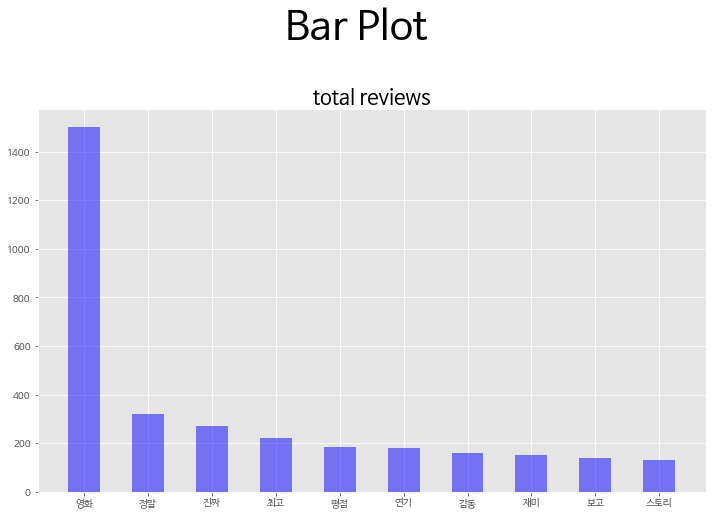

In [17]:
plt.rc('font', family='NanumBarunGothic') 
top_10 = dict(noun_list[:10])
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

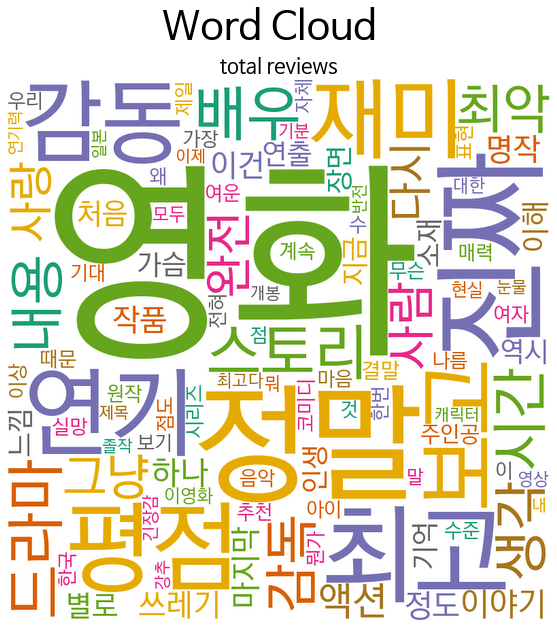

In [18]:
total_reviews = visualize(noun_list,'total reviews')

최고, 감동 등 긍정적인 키워드와 최악, 쓰레기 등 부정적인 키워드가 혼재함을 확인할 수 있습니다.

이번에는 긍정, 부정리뷰 별 키워드를 각각 확인해보겠습니다.

### 긍정 리뷰 워드클라우드 생성

긍정리뷰만을 가지고 워드클라우드를 생성해보겠습니다.

먼저 전체 긍정 리뷰를 하나의 문자열로 만든 뒤 명사 리스트를 만듭니다.

In [19]:
document_p = df2str(df_pos) # 긍정 리뷰 데이터프레임을 하나의 큰 문자열로 만듭니다.
noun_list_p = get_noun(document_p) # 명사만을 추출하고 빈도수를 계산합니다.
noun_list_p[:20]

[('영화', 757),
 ('정말', 216),
 ('최고', 214),
 ('진짜', 136),
 ('감동', 134),
 ('연기', 108),
 ('드라마', 89),
 ('보고', 88),
 ('사랑', 72),
 ('다시', 70),
 ('평점', 67),
 ('생각', 65),
 ('명작', 60),
 ('배우', 58),
 ('사람', 55),
 ('완전', 54),
 ('마지막', 52),
 ('가슴', 51),
 ('이야기', 50),
 ('재미', 48)]

긍정 리뷰의 상위 20개 키워드를 확인하였더니

최고, 감동, 사랑, 재미 등 긍정적인 감정을 드러내는 단어들이 보입니다.

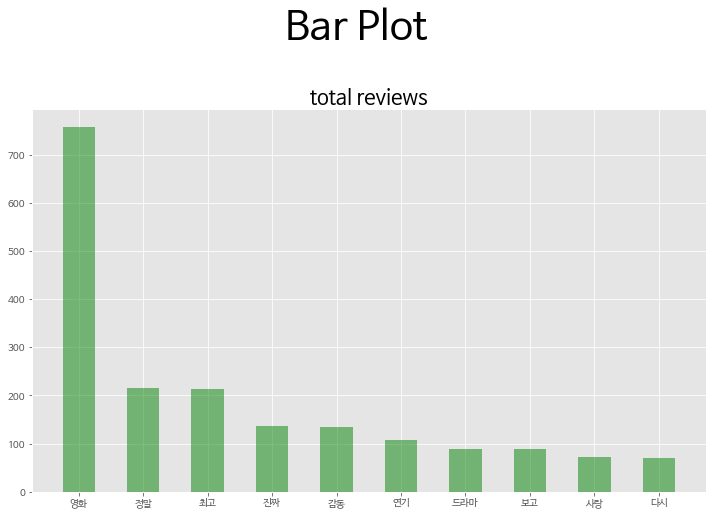

In [20]:
plt.rc('font', family='NanumBarunGothic') 
top_10 = dict(noun_list_p[:10])
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='green', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

긍정 리뷰 워드 클라우드를 생성합니다.

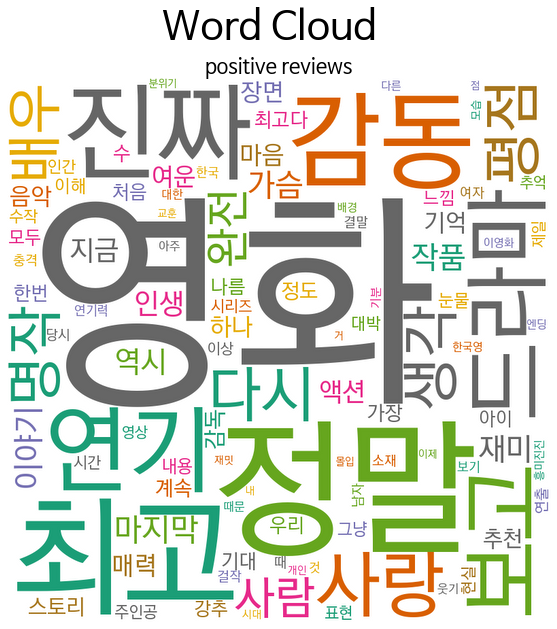

In [21]:
positive_reviews = visualize(noun_list_p, 'positive reviews')

### 부정 리뷰

이번에는 부정리뷰만을 가지고 워드클라우드를 생성해보겠습니다.

먼저 전체 부정 리뷰를 하나의 문자열로 만든 뒤 명사 리스트를 만듭니다.

In [22]:
document_n = df2str(df_neg) # 부정 리뷰 데이터프레임을 하나의 큰 문자열로 만듭니다.
noun_list_n = get_noun(document_n) # 명사만을 추출하고 빈도수를 계산합니다.
noun_list_n[:20]

[('영화', 746),
 ('진짜', 132),
 ('평점', 118),
 ('재미', 104),
 ('정말', 104),
 ('스토리', 102),
 ('최악', 98),
 ('시간', 97),
 ('내용', 85),
 ('감독', 78),
 ('그냥', 75),
 ('연기', 72),
 ('쓰레기', 70),
 ('배우', 69),
 ('이건', 55),
 ('별로', 53),
 ('보고', 52),
 ('액션', 43),
 ('하나', 41),
 ('사람', 41)]

부정 리뷰의 상위 20개 키워드를 확인하였더니

대표적으로 최악, 쓰레기, 별로 등의 부정적인 감정을 드러내는 단어가 눈에 띕니다.

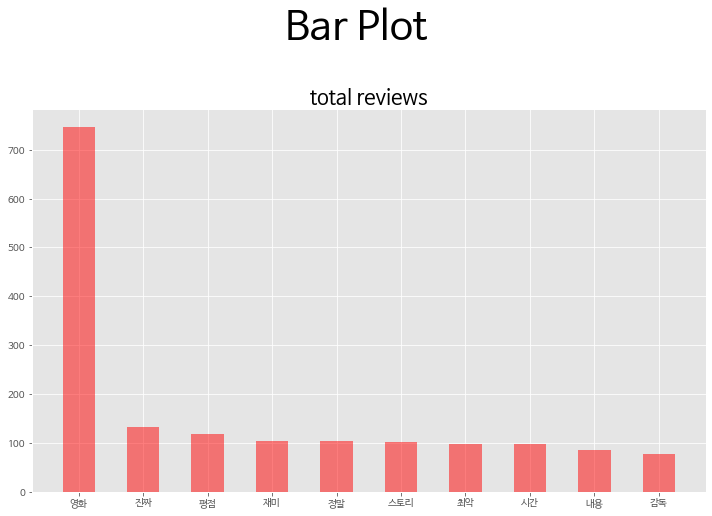

In [23]:
plt.rc('font', family='NanumBarunGothic') 
top_10 = dict(noun_list_n[:10])
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='r', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

다시 부정 리뷰 워드클라우드를 그려보겠습니다.

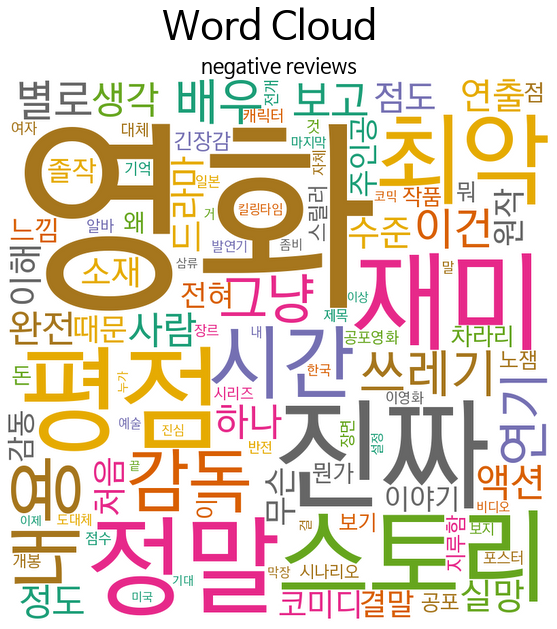

In [24]:
negative_reviews = visualize(noun_list_n, 'negative reviews')

# 중복 단어 제거하기

위 워드클라우드를 보면 "영화", "진짜", "정말"과 같이 긍정 부정 리뷰 모두 등장하는 단어들이 존재합니다.

이러한 문제를 해결하기 위해 긍정, 부정 리뷰에 공통적으로 등장하는 단어들을 제거한 뒤 다시 시각화하겠습니다.

In [26]:
print("부정 리뷰 Top10:", noun_list_n[:10])
print("긍정 리뷰 Top10:", noun_list_p[:10])

부정 리뷰 Top10: [('영화', 746), ('진짜', 132), ('평점', 118), ('재미', 104), ('정말', 104), ('스토리', 102), ('최악', 98), ('시간', 97), ('내용', 85), ('감독', 78)]
긍정 리뷰 Top10: [('영화', 757), ('정말', 216), ('최고', 214), ('진짜', 136), ('감동', 134), ('연기', 108), ('드라마', 89), ('보고', 88), ('사랑', 72), ('다시', 70)]


위와 같이 공통 단어들이 많이 등장함을 확인했습니다.

따라서 긍정리뷰와 부정 리뷰 모두 자주 등장하는 단어들을 골라내보겠습니다.

In [31]:
neg = list(dict(noun_list_n).keys())
pos = list(dict(noun_list_p).keys())

drop_words = [x for x in neg if x in pos]
print("공통으로 등장하는 단어들 Top10\n",drop_words[:10])

공통으로 등장하는 단어들 Top10
 ['영화', '진짜', '평점', '재미', '정말', '스토리', '시간', '내용', '감독', '그냥']


과정이 잘 이루어졌군요!

다음으로 해당 단어들을 각각 단어 리스트에서 제거하겠습니다.

In [28]:
noun_list_n_filter = [x for x in noun_list_n if x[0] not in drop_words]
noun_list_p_filter = [x for x in noun_list_p if x[0] not in drop_words]

In [30]:
print("정제된 부정 리뷰 상위 단어 Top10\n",noun_list_n_filter[:10])

정제된 부정 리뷰 상위 단어 Top10
 [('최악', 98), ('쓰레기', 70), ('이건', 55), ('별로', 53), ('실망', 36), ('수준', 36), ('점도', 34), ('원작', 31), ('무슨', 31), ('코미디', 29)]


마지막으로 정제된 두 단어 리스트들을 워드클라우드로 시각화해봅니다.

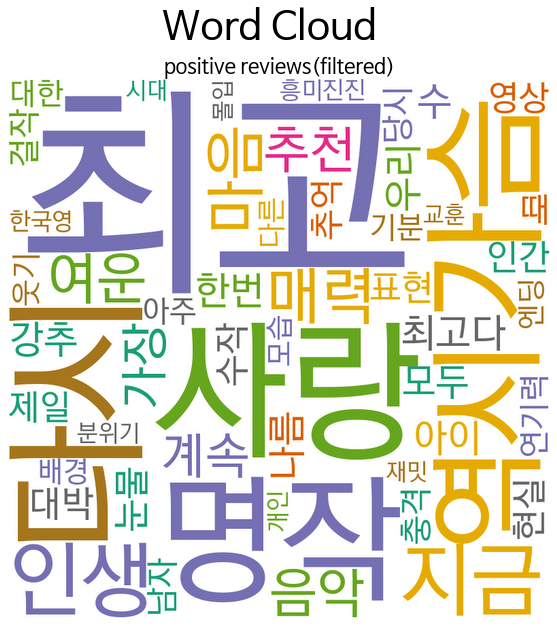

In [128]:
positive_reviews_filtered = visualize(noun_list_p_filter, 'positive reviews(filtered)')

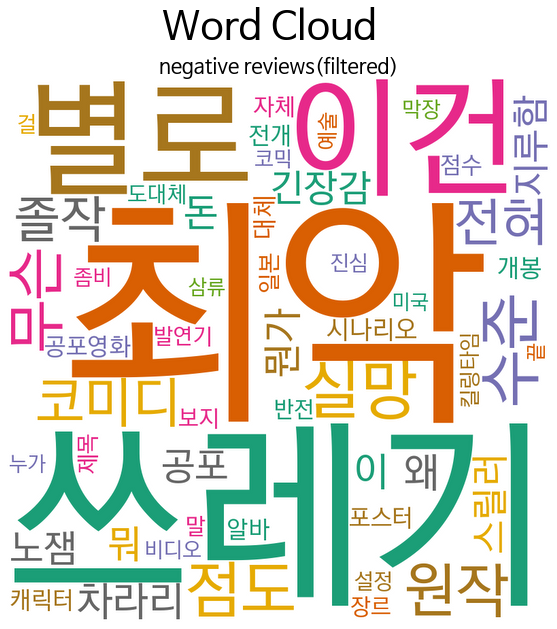

In [129]:
negative_reviews_filtered = visualize(noun_list_n_filter, 'negative reviews(filtered)')

긍/부정 라벨에 따라 등장하는 단어가 카테고리에 잘 분리되었습니다!

이제 이 노트북에서 데이터를 둘러보는 작업은 마무리하겠습니다.

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요를 많이 받으시는 분께는 데이콘 후드가 제공됩니다!